In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned dataset
df = pd.read_csv("../data/processed/laptops_clean.csv")

In [3]:
print("shape:", df.shape)
df.head()

shape: (1303, 20)


,Company,TypeName,Inches,Price_euros,Ram (GB),Weight (kg),HDD (GB),SSD (GB),Hybrid (GB),Flash Storage (GB),Total_Storage (GB),OpSys_Clean,Screen_Width,Screen_Height,Touchscreen,Cpu_Speed_GHz,Cpu_Brand,Cpu_Name,Gpu_Brand,Gpu_Name
0,Apple,Ultrabook,13.3,1339.69,8,1.37,0.0,128.0,0.0,0.0,128.0,MacOS,2560,1600,0,2.3,Intel,Core i5,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,898.94,8,1.34,0.0,0.0,0.0,128.0,128.0,MacOS,1440,900,0,1.8,Intel,Core i5,Intel,HD Graphics 6000
2,HP,Notebook,15.6,575.00,8,1.86,0.0,256.0,0.0,0.0,256.0,No OS,1920,1080,0,2.5,Intel,Core i5 7200U,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,2537.45,16,1.83,0.0,512.0,0.0,0.0,512.0,MacOS,2880,1800,0,2.7,Intel,Core i7,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,1803.60,8,1.37,0.0,256.0,0.0,0.0,256.0,MacOS,2560,1600,0,3.1,Intel,Core i5,Intel,Iris Plus Graphics 650


### Univariate Analysis (Single Features)

#### Numerical Features

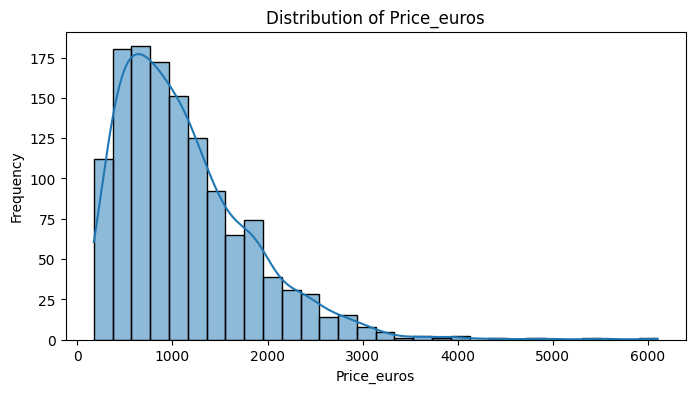

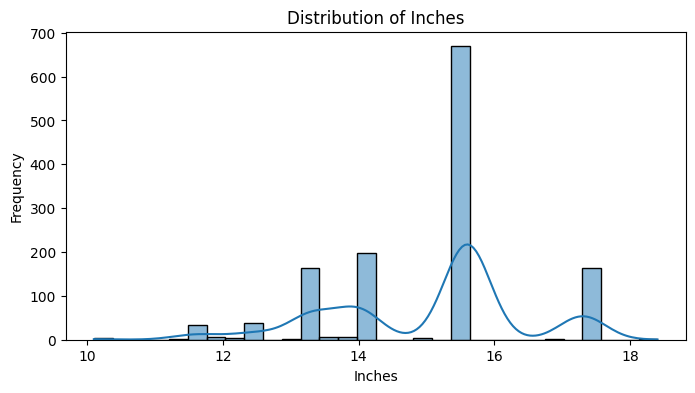

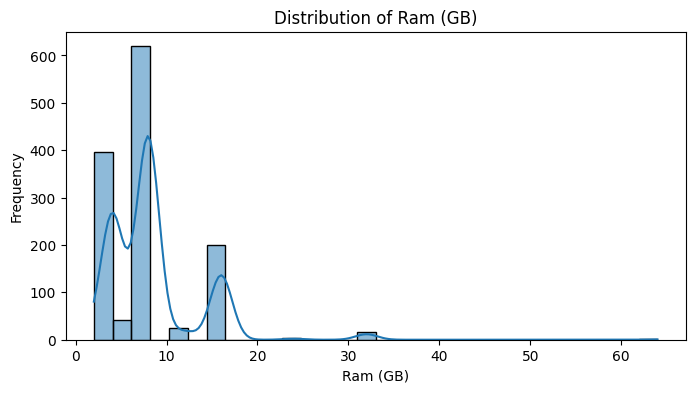

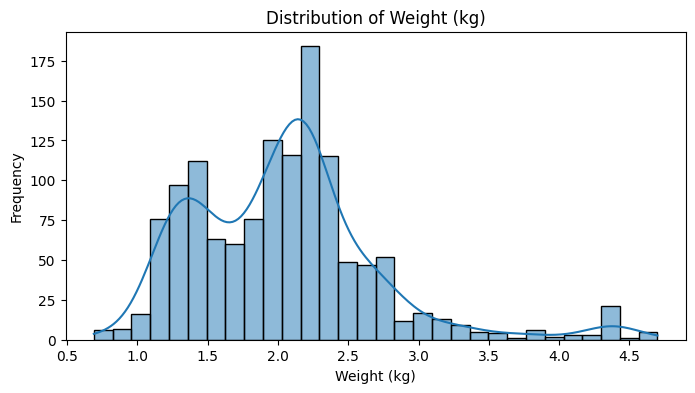

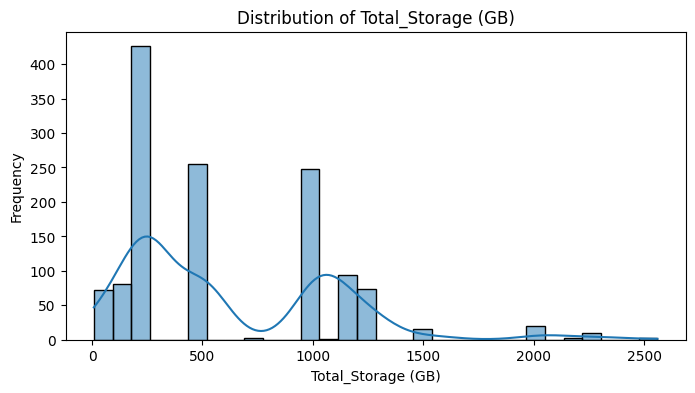

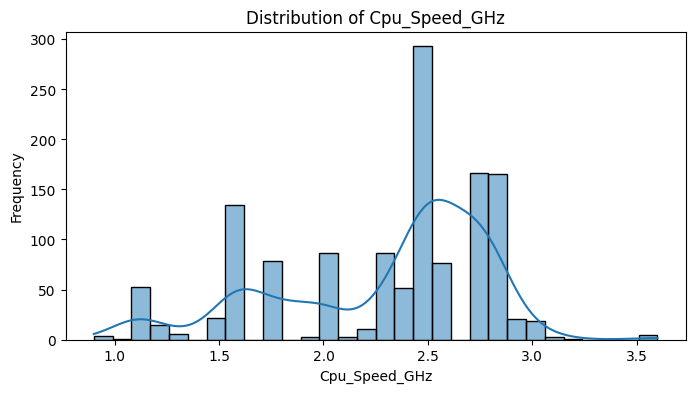

In [4]:
num_cols = ['Price_euros', 'Inches', 'Ram (GB)', 'Weight (kg)', 'Total_Storage (GB)', 'Cpu_Speed_GHz']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, edgecolor='black', kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Numerical Features (Histograms):**

- **Price_euros:** Most laptops are priced between 500 and 1500 euros, with a long tail of higher-priced models.  
- **Inches:** The majority of laptops have screen sizes around 13 to 15 inches, with fewer very small or very large models.  
- **Ram (GB):**  Eight gigabyte RAM is the most common, followed by 4 GB and 16 GB, indicating a focus on mid-range performance.  
- **Weight (kg):** Most laptops weigh between 1 and 2.5 kg, suggesting portability is a key feature.  
- **Total_Storage (GB):** Storage is clustered around 128 GB, 256 GB, 512 GB, and 1 TB, reflecting common SSD/HDD configurations.  
- **Cpu_Speed_GHz:** CPU speeds are mostly between 1.5 and 3.0 GHz, with a peak around 2.5 GHz.

#### Categorical Features

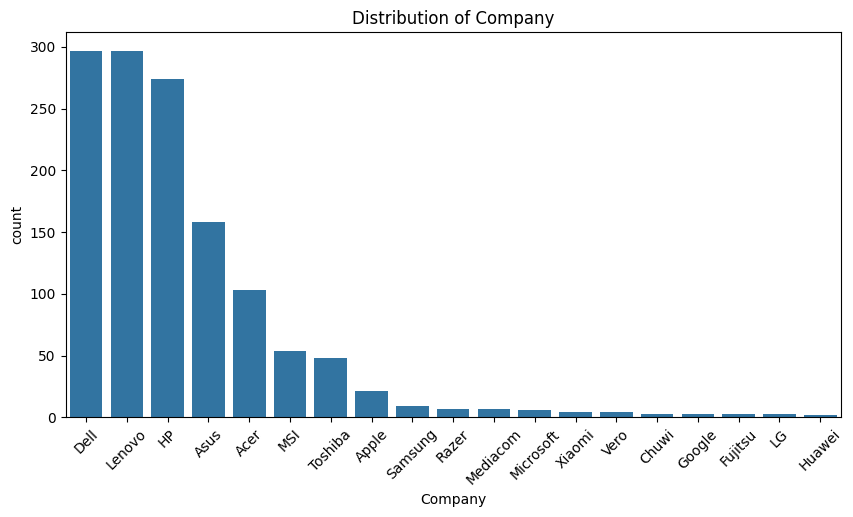

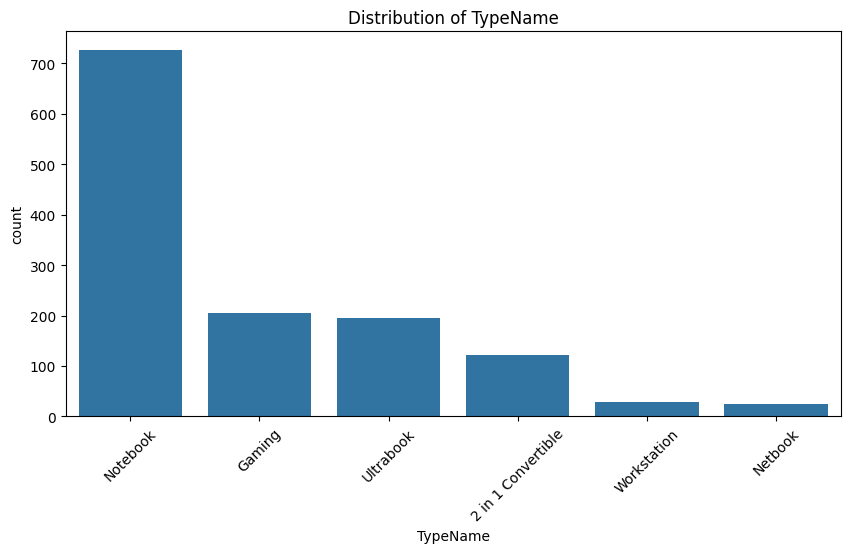

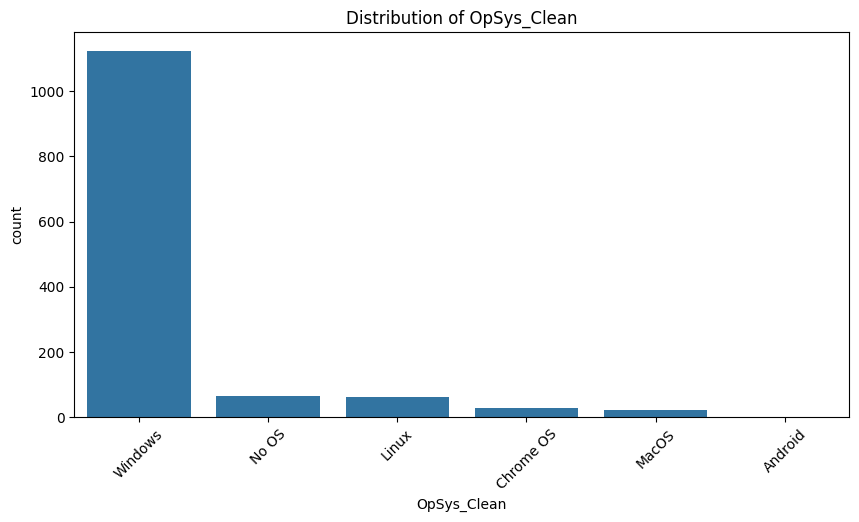

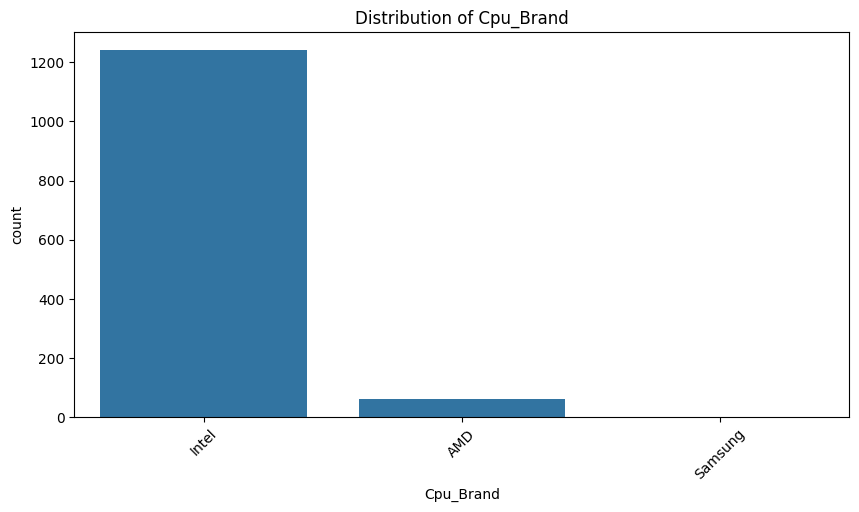

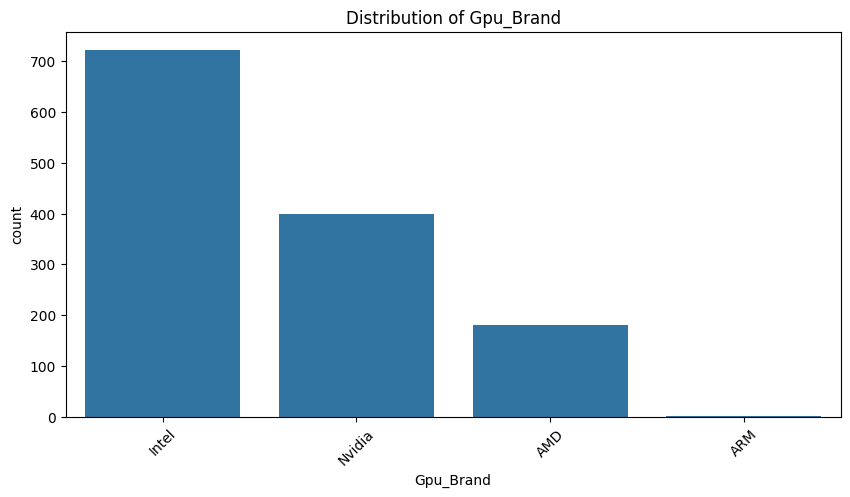

In [5]:
cat_cols = ['Company', 'TypeName', 'OpSys_Clean', 'Cpu_Brand', 'Gpu_Brand']

for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


- **Categorical Features (Countplots):**  
    - **Company:** Lenovo, Dell, and HP are the most represented brands, while others like MSI and Google are less common.  
    - **TypeName:** Most laptops are Notebooks or Ultrabooks, with fewer Gaming, Workstation, or Convertible types.  
    - **OpSys_Clean:** Windows dominates, followed by MacOS and a small number of Linux/No OS devices.  
    - **Cpu_Brand:** Intel CPUs are far more common than AMD.  
    - **Gpu_Brand:** Intel integrated GPUs are most frequent, with Nvidia and AMD present in fewer models.

### Bivariate Analysis (Features versus price)

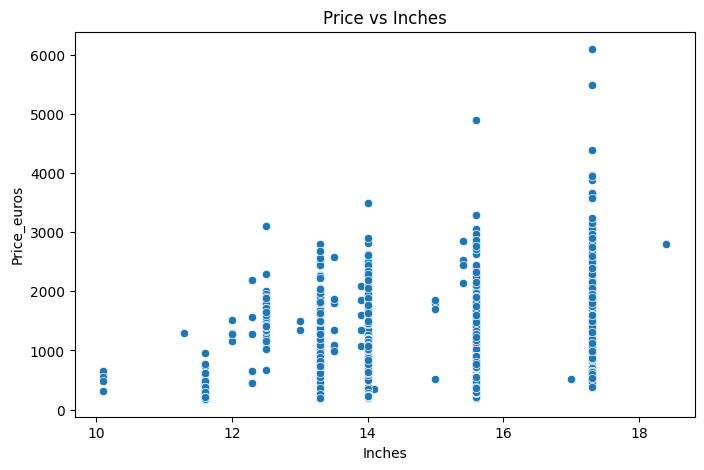

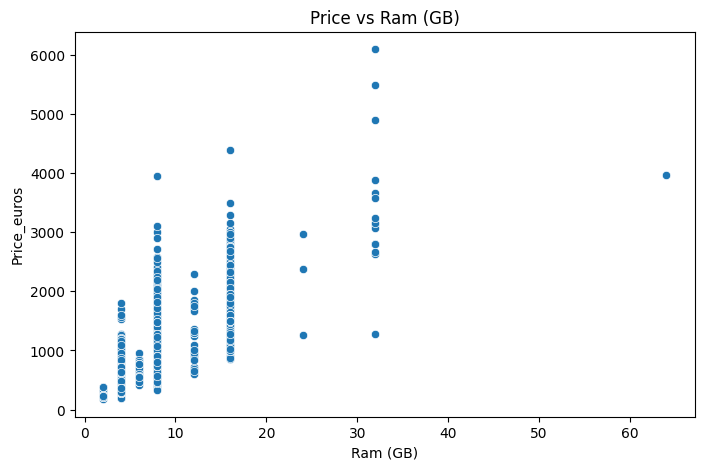

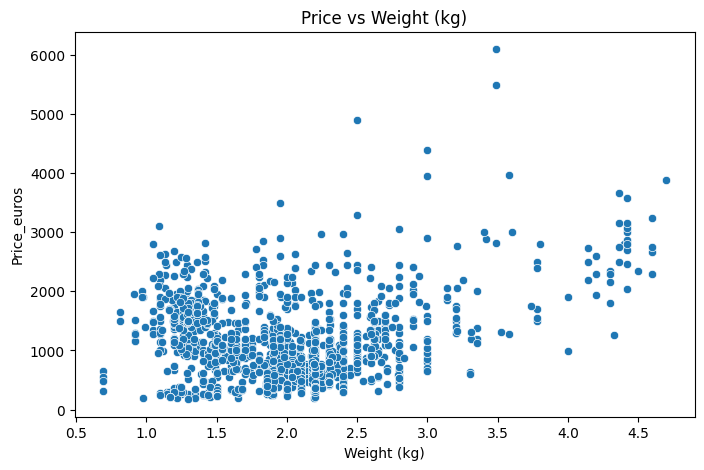

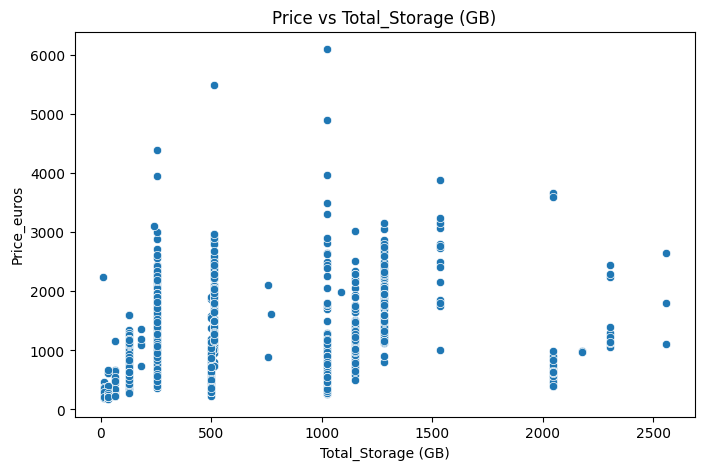

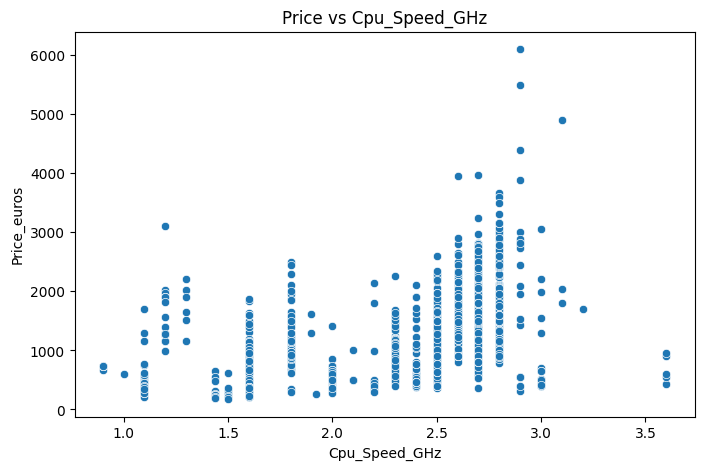

In [6]:
for col in ['Inches', 'Ram (GB)', 'Weight (kg)', 'Total_Storage (GB)', 'Cpu_Speed_GHz']:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=col, y='Price_euros', data=df)
    plt.title(f"Price vs {col}")
    plt.show()



**Bivariate Analysis:**

- **Scatterplots (Numeric vs Price):**  
    - **Inches vs Price:** Larger screens tend to be associated with higher prices, but there is wide variation.  
    - **Ram (GB) vs Price:** Laptops with more RAM generally cost more, especially at 16GB and above.  
    - **Weight (kg) vs Price:** No strong trend, but some heavier laptops are more expensive, likely due to gaming/workstation models.  
    - **Total_Storage (GB) vs Price:** Higher storage capacities are linked to higher prices, but with significant overlap.  
    - **Cpu_Speed_GHz vs Price:** Faster CPUs are generally found in more expensive laptops, though not exclusively.

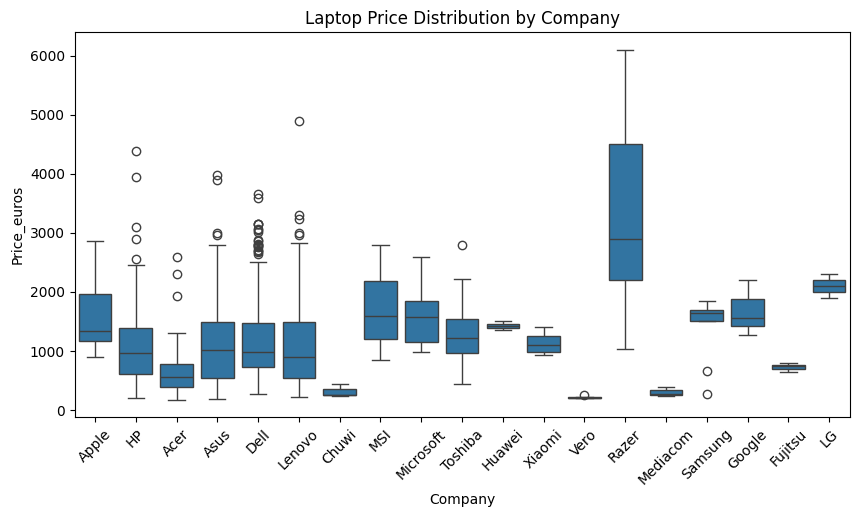

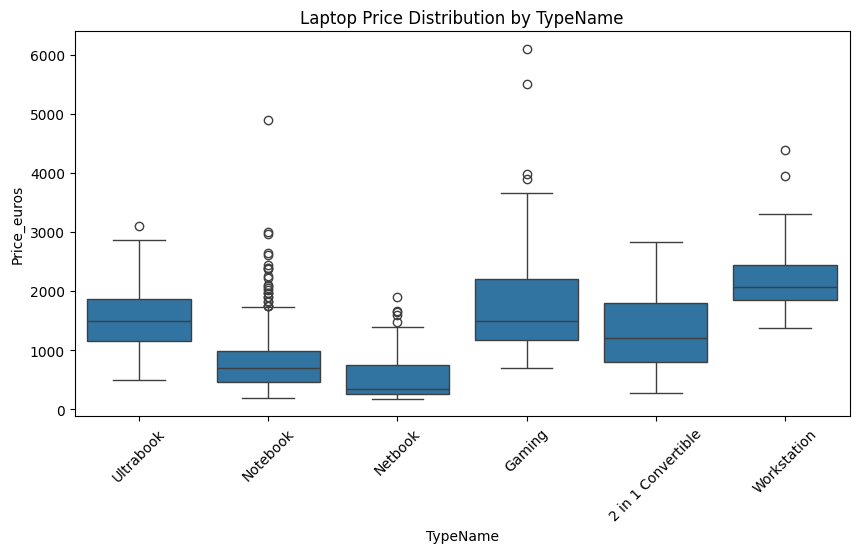

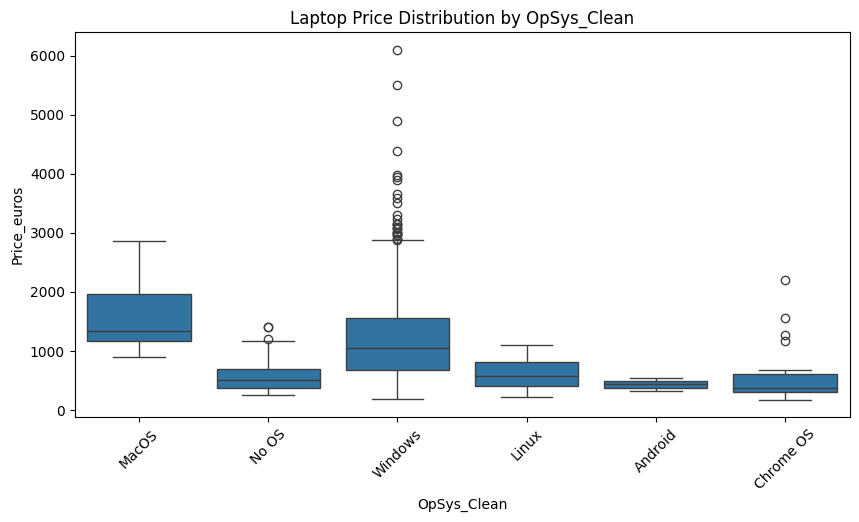

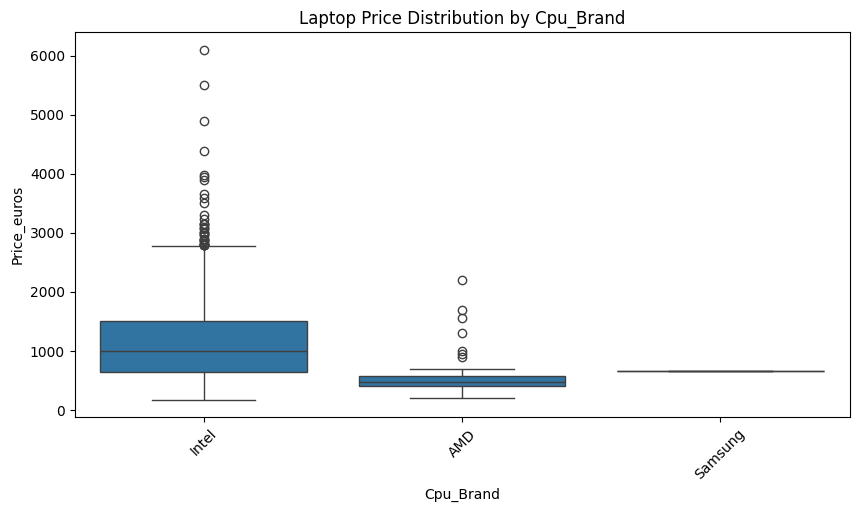

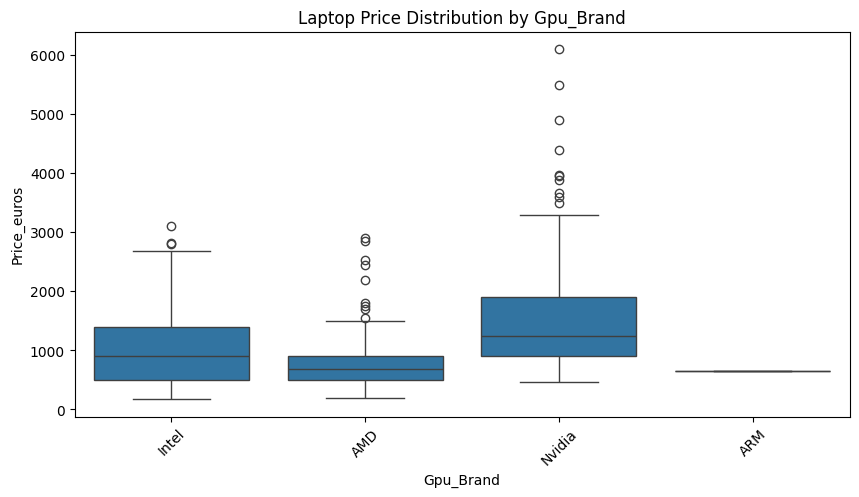

In [7]:
# Boxplots for Categorical Features vs Price

for col in ['Company', 'TypeName', 'OpSys_Clean', 'Cpu_Brand', 'Gpu_Brand']:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y='Price_euros', data=df)
    plt.xticks(rotation=45)
    plt.title(f"Laptop Price Distribution by {col}")
    plt.show()


- **Boxplots (Categorical vs Price):**  
    - **Company:** Apple laptops have the highest median prices, while brands like Asus and Acer are more affordable.  
    - **TypeName:** Gaming and Workstation laptops are priced higher than Notebooks and Ultrabooks.  
    - **OpSys_Clean:** MacOS devices are more expensive on average than Windows or Linux laptops.  
    - **Cpu_Brand:** Laptops with Intel CPUs have a wider price range, but AMD models tend to be less expensive.  
    - **Gpu_Brand:** Laptops with Nvidia GPUs are generally the most expensive, followed by AMD, with Intel being the least expensive.

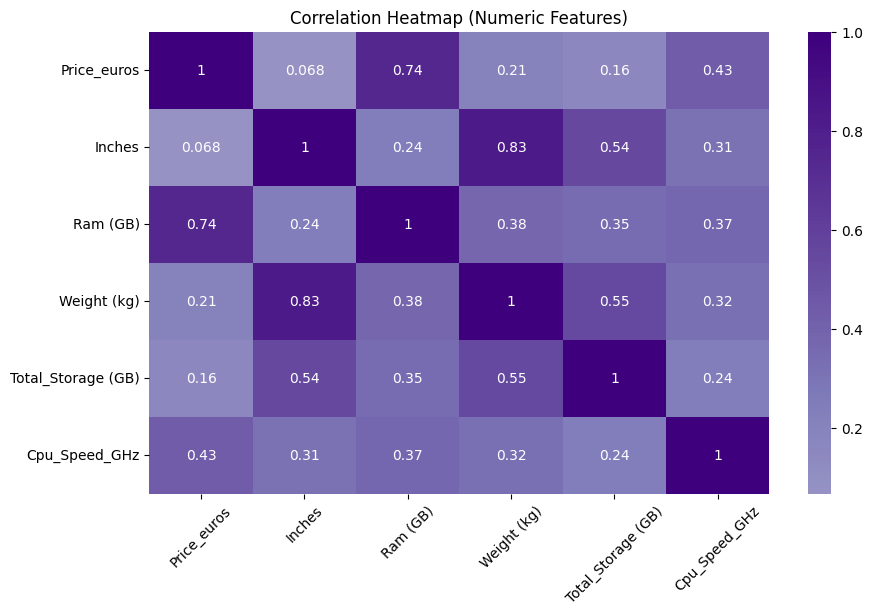

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Purples', center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.xticks(rotation=45)
plt.show()


- **Correlation Heatmap:**  

- RAM, storage, and CPU speed have positive correlations with price, indicating these features drive higher costs.  

- Inches and weight are moderately correlated with each other and with price, reflecting that larger laptops often cost more.
